# Airbnb Madrid

## 1. Análisis Airbnb Madrid

In [1]:
# Importo librerias

import pandas as pd
import numpy as np
import src.clean as cl        # --> Archivo de funciones
import src.funciones as fn    # --> Archivo de funciones
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from collections import Counter

#import plotly.express as px

In [2]:
airbnb=pd.read_csv("output/Airbnb2_Madrid.csv")
airbnb=airbnb.drop(columns=['Unnamed: 0'])
#airbnb.head()

In [3]:
print(f'\n\nExiste un total de {airbnb.shape[0]} diferentes alojamientos distribuidos por la Comunidad de Madrid.\n')
print(f'Airbnb agrupa las ofertas en {len(airbnb.neighbourhood_group.unique())} zonas o vecindarios. Estas zonas son:\n')
for i in airbnb.neighbourhood_group.unique():
    print(' -',i)



Existe un total de 19305 diferentes alojamientos distribuidos por la Comunidad de Madrid.

Airbnb agrupa las ofertas en 21 zonas o vecindarios. Estas zonas son:

 - Chamartín
 - Latina
 - Centro
 - Arganzuela
 - Salamanca
 - Tetuán
 - Fuencarral - El Pardo
 - Ciudad Lineal
 - Chamberí
 - Villaverde
 - Hortaleza
 - Moncloa - Aravaca
 - Carabanchel
 - Retiro
 - San Blas - Canillejas
 - Villa de Vallecas
 - Barajas
 - Usera
 - Puente de Vallecas
 - Moratalaz
 - Vicálvaro


### Distribución por zonas:

### 
El siguiente gráfico representa el recuento de Airbnb en los diferentes grupos de vecindarios. Desde la gráfica, podemos visualizar fácilmente que el número máximo de casas o apartamentos que figuran en Airbnb están en el centro

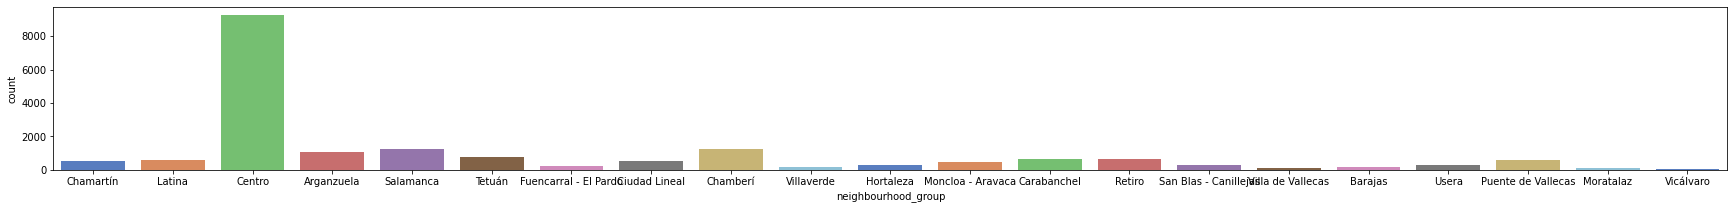

In [4]:
f,ax = plt.subplots(figsize=(30,3))
ax = sns.countplot(airbnb.neighbourhood_group,palette="muted")
plt.show()

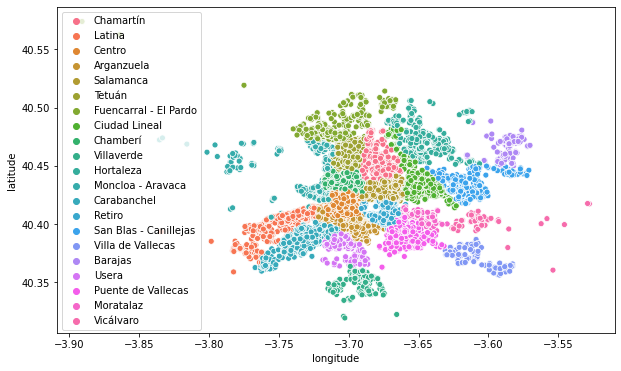

In [5]:
# Llamo a la función 'mapa' del archivo de funciones
fn.mapa(airbnb['longitude'],airbnb['latitude'],airbnb['neighbourhood_group'])

### Análisis de los tipos de alojamiento

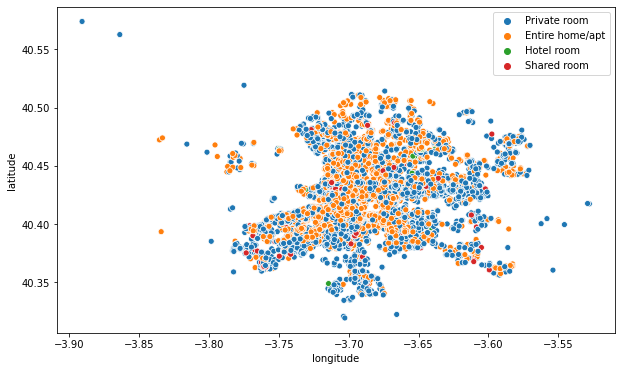

In [6]:
# Llamo a la función 'mapa' del archivo de funciones
fn.mapa(airbnb['longitude'],airbnb['latitude'],airbnb['room_type'])

### 
La mayoría de los alojamientos en Madrid son del tipo apartamento o habitación privada, entre los dos suman el 96.6% del total.

In [7]:
# Entire home - 60.8% || Private room - 35.8%
print(airbnb['room_type'].value_counts())

Entire home/apt    11741
Private room        6913
Hotel room           393
Shared room          258
Name: room_type, dtype: int64


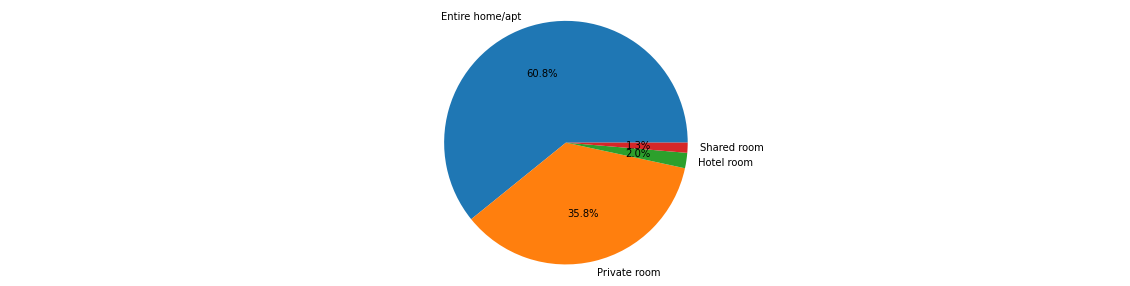

In [8]:
room = airbnb['room_type'].value_counts().reset_index()
room.columns = ['room_type', 'Count']
room['Percent'] = room['Count']/room['Count'].sum() * 100

fig1, ax1 = plt.subplots(figsize=(20,5))
ax1.pie(list(room['Percent']), labels=list(room['room_type']), autopct='%1.1f%%')
ax1.axis('equal')

plt.show()

### Análisis de precios

In [9]:
pmax = airbnb['price'].max()
pmin = airbnb['price'].min()
pmean = int(airbnb['price'].mean())

In [10]:
print(f'\n\nEn cuanto a los precios, el alojamiento más caro que encontramos en Madrid asciende a {pmax}€, y el más barato {pmin}€, siendo la media de todos los alojamientos de {pmean}€.')



En cuanto a los precios, el alojamiento más caro que encontramos en Madrid asciende a 299€, y el más barato 8€, siendo la media de todos los alojamientos de 72€.


### 
Se observa también que el precio varía en función de las zonas, siendo la zona más cara el barrio de Salamanca con un precio medio por alojamiento de 88€/noche, y la más barata Villaverde con un precio medio de 39€/noche.

In [11]:
print(airbnb.groupby("neighbourhood_group")["price"].mean().sort_values())

neighbourhood_group
Villaverde               39.227848
Usera                    41.810289
Puente de Vallecas       42.539007
Latina                   46.486726
Moratalaz                50.739130
Ciudad Lineal            53.361511
Carabanchel              54.169255
Fuencarral - El Pardo    55.256705
Villa de Vallecas        55.586957
Barajas                  56.006944
Arganzuela               60.201112
Tetuán                   64.536000
Vicálvaro                65.574074
Hortaleza                68.667832
Moncloa - Aravaca        71.011976
Chamberí                 72.379675
San Blas - Canillejas    73.803125
Retiro                   76.851501
Chamartín                79.134653
Centro                   81.283653
Salamanca                88.203837
Name: price, dtype: float64


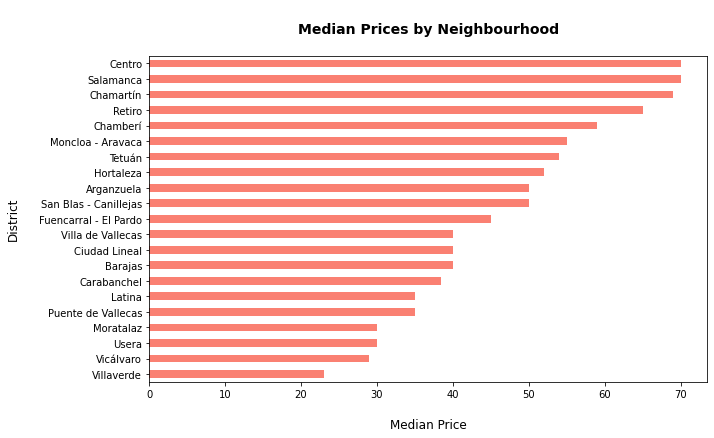

In [12]:
# Agrupo por neighbourhood groups, cojo el precio medio y guardo los valores en un nuevo df 
abnb_grouped = pd.DataFrame(airbnb.groupby(['neighbourhood_group'])['price'].agg(np.median))
abnb_grouped.reset_index(inplace=True)
abnb_grouped=abnb_grouped.sort_values(by=['price'], ascending=True)

# Visualizo
abnb_grouped.plot(kind='barh', x='neighbourhood_group', y='price',figsize=(10,6), legend=False, color='salmon')
plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nMedian Prices by Neighbourhood\n', fontsize=14, fontweight='bold');

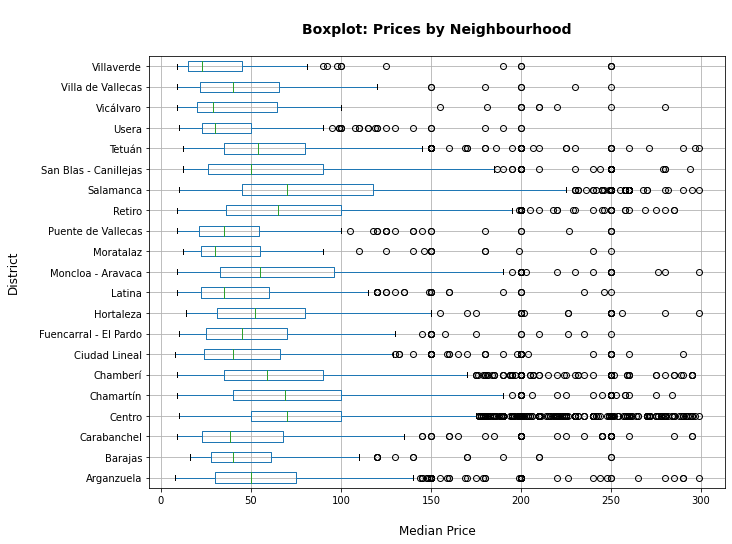

In [13]:
airbnb.boxplot(column='price', by='neighbourhood_group', vert=False, figsize=(10,8))

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nBoxplot: Prices by Neighbourhood\n', fontsize=14, fontweight='bold')

# Elimino el título automático
plt.suptitle('');

##### Precio medio por tipo de alojamiento:
En la siguiente gráfica podemos ver que el alojamiento más caro son los aparrtamentos y el más bajo las habitaciones compartidas

In [14]:
room_avg_price = airbnb.groupby("room_type")["price"].mean()
print(room_avg_price)

room_type
Entire home/apt    90.764330
Hotel room         84.180662
Private room       42.990308
Shared room        38.844961
Name: price, dtype: float64


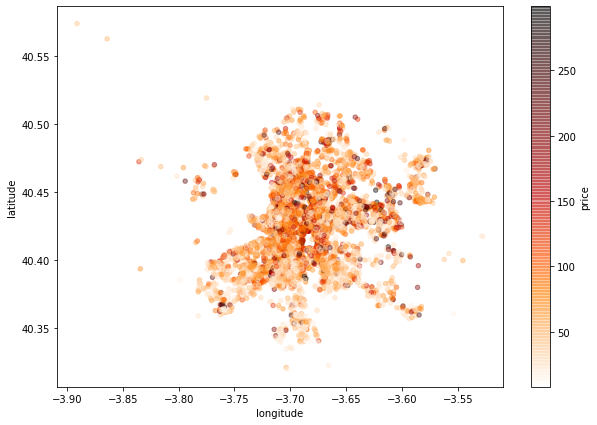

In [15]:
# Diferencias de precios en mapa.
# Se observa que por lo general cuanto más centrico es el alojamiento mayor precio tiene.
airbnb.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7), 
        c="price", cmap="gist_heat_r", colorbar=True, sharex=False);

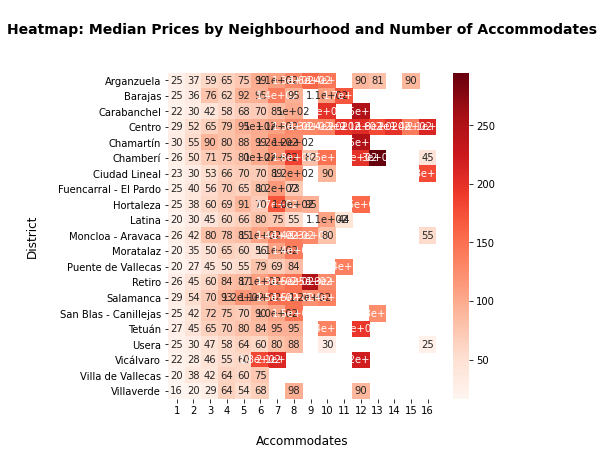

In [16]:
# Precios por número de habitaciones
plt.figure(figsize=(6,6))
sns.heatmap(airbnb.groupby(['neighbourhood_group', 'accommodates']).price.median().unstack(), cmap='Reds', annot=True)
plt.xlabel('\nAccommodates', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nHeatmap: Median Prices by Neighbourhood and Number of Accommodates\n\n', fontsize=14, fontweight='bold');

### Amentities

##### Las comodidades que ofrecen los anfitriones a sus huéspedes son las que se muestran a continuación:

In [17]:
# La función Counter() dentro de la biblioteca collections es un contenedor que registra cuántas veces se agregan valores equivalentes

results = Counter()
airbnb['amenities'].str.strip('{}')\
                   .str.replace('"', '')\
                   .str.lstrip('\"')\
                   .str.rstrip('\"')\
                   .str.split(',')\
                   .apply(results.update)

results.most_common(30)

[('Wifi', 18455),
 ('Essentials', 18088),
 ('Kitchen', 17635),
 ('Heating', 17129),
 ('Washer', 16199),
 ('Hangers', 15952),
 ('TV', 15410),
 ('Hair dryer', 14152),
 ('Iron', 14094),
 ('Shampoo', 13732),
 ('Hot water', 12147),
 ('Laptop friendly workspace', 12143),
 ('Air conditioning', 11979),
 ('Elevator', 11154),
 ('Refrigerator', 8709),
 ('Dishes and silverware', 8501),
 ('Microwave', 8196),
 ('Bed linens', 7539),
 ('Coffee maker', 7536),
 ('Cooking basics', 7356),
 ('Host greets you', 7002),
 ('No stairs or steps to enter', 6986),
 ('Family/kid friendly', 6341),
 ('Stove', 5808),
 ('Long term stays allowed', 5723),
 ('Oven', 5620),
 ('First aid kit', 5082),
 ('Extra pillows and blankets', 4802),
 ('Paid parking off premises', 4421),
 ('Fire extinguisher', 4256)]

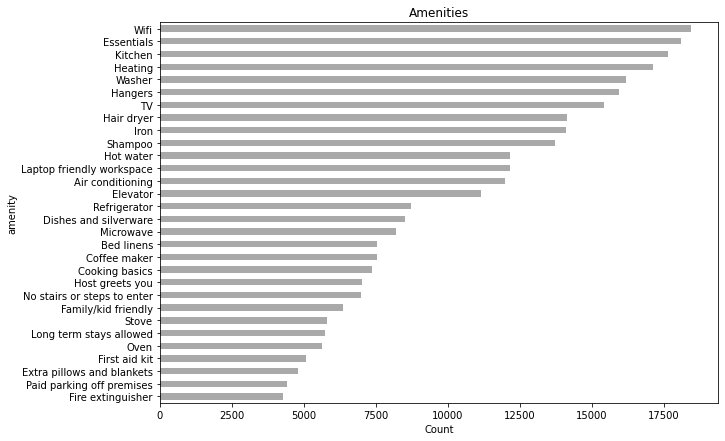

In [18]:
# Creo un nuevo dataframe para las amentities
airbnb_amenity = pd.DataFrame(results.most_common(30), columns=['amenity', 'count'])

# Visualizamos 
airbnb_amenity.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(10,7), legend=False, color='darkgrey',
                                                      title='Amenities')
plt.xlabel('Count');

## 2. Búsqueda de alojamiento

##### Ayuda al usuario para encontrar alojamiento.

En este apartado se va a ayudar al usuario a buscar el alojamiento que mejor se adapte a sus necesidades. 

In [19]:
# Hago una copia del df sobre la que voy a buscar el alojamiento ideal para el usuario
propuesta=airbnb

In [20]:
# Le pido al usuario que indique el tipo de alojamiento que está buscando

print(f'Introduce el tipo de alojamiento que desea (número de opción):')
fn.imprime_opciones(propuesta['room_type']) # función definida en funciones.py
op=int(input('Opción seleccionada:'))

Introduce el tipo de alojamiento que desea (número de opción):
 1. Private room
 2. Entire home/apt
 3. Hotel room
 4. Shared room
Opción seleccionada:2


In [21]:
# Elimino del df las opciones que no me interesan
propuesta= propuesta[propuesta['room_type']==propuesta.room_type.unique()[op-1]]

In [22]:
# Le pido al usuario que introduzca el número de personas para el que busca alojamiento
print(f'Introduce el número de personas (número de opción):')
fn.imprime_opciones(propuesta['accommodates'].sort_values())
op=int(input('Opción seleccionada:'))

Introduce el número de personas (número de opción):
 1. 1
 2. 2
 3. 3
 4. 4
 5. 5
 6. 6
 7. 7
 8. 8
 9. 9
 10. 10
 11. 11
 12. 12
 13. 13
 14. 14
 15. 15
 16. 16
Opción seleccionada:4


In [23]:
# Elimino del df las opciones que no me interesan
propuesta= propuesta[propuesta['accommodates']<=propuesta.accommodates.sort_values().unique()[op-1]]

In [24]:
# Le pido al usuario que introduzca el precio máximo y mínino qe está dispuesto a pagar:
min_p=int(input('Introduce el precio mínimo que estás buscando:'))
max_p=int(input('Introduce el precio máximo que estás buscando:'))

Introduce el precio mínimo que estás buscando:60
Introduce el precio máximo que estás buscando:120


In [25]:
propuesta = propuesta[propuesta['price'] >= min_p]
propuesta = propuesta[propuesta['price'] <= max_p]

In [38]:
propuesta.head()

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,listing_url,description,accommodates,amenities,No_of_amentities,distance_central,distance_airport,distance_train,avg_distance,distance1,distance2
2,24805,Gran Via Studio Madrid,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,https://www.airbnb.com/rooms/24805,"Studio located 50 meters from Gran Via, next t...",3,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",32,0.59,13.78,1.64,2.350,3.34,1.36
3,24836,"Select the Madrid more ""cool"".",Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,https://www.airbnb.com/rooms/24836,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...",4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",18,0.60,13.47,1.28,1.945,3.06,0.83
5,30320,Great Vacational Apartments,Centro,Sol,40.41552,-3.70346,Entire home/apt,65,5,https://www.airbnb.com/rooms/30320,Fully furnished spacious vacational apartments...,2,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",8,0.13,14.16,1.00,1.800,2.62,0.98
7,40916,Holiday Apartment Madrid Center,Centro,Universidad,40.42096,-3.70428,Entire home/apt,90,3,https://www.airbnb.com/rooms/40916,We rent fully furnished holiday apartments rig...,3,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets allo...",9,0.48,13.87,1.55,2.265,3.23,1.30
10,70059,"PLAZA ESPAÑA/Wifi/ downtown /parking. Cozy, Br...",Centro,Universidad,40.42365,-3.70889,Entire home/apt,65,5,https://www.airbnb.com/rooms/70059,"Nice, cozy and very bright apartment, just in ...",2,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",29,0.90,14.02,2.00,2.700,3.61,1.79


### Tenemos los filtros básicos que todo usuario necesita cuando busca alojamiento. Ahora vamos a ayudar al usuario a buscar la mejor ubicación en función de los planes que tenga durante su estancia.

### ¿Tienes una fiesta? ¿Una boda? ¿Un concierto? ¿Algún otro evento?
El usuario debe introducir el número de sitios de los que le interesa estar cerca, buscar las coordenadas e introducirlas cuando el sistema se lo indique.
En el ejemplo se solicita estar cerca de dos ubicaciones:
- Matadero (long = 40.39244, lat = -3.69724)
- Museo del Prado (long = 40.41378, lat = -3.69213)

In [27]:
prop=propuesta
longitude=[]
latitude=[]

In [28]:
visitas=int(input('Introduce el número de sitios que te interesa visitar:'))

Introduce el número de sitios que te interesa visitar:2


In [29]:
for i in range(visitas):
    print(f'Por favor, introduce las coordenadas de los lugares a visitar.\n Ubicación {i+1}')
    longitude.append(float(input('Longitude:')))
    latitude.append(float(input('Latitude:')))

Por favor, introduce las coordenadas de los lugares a visitar.
 Ubicación 1
Longitude:40.39244
Latitude:-3.69724
Por favor, introduce las coordenadas de los lugares a visitar.
 Ubicación 2
Longitude:40.41378
Latitude:-3.69213


In [30]:
prop['avg_distance'] = int(0)
for i in range(visitas):
    n='distance'
    n+=str(i+1)
    prop[n] = prop.apply(fn.dist,lonM=longitude[i], latM=latitude[i], axis=1)
    prop['avg_distance']+=prop[n]
prop['avg_distance']/=visitas

In [31]:
prop = prop.sort_values('avg_distance').reset_index()
prop.head()

,index,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,description,accommodates,amenities,No_of_amentities,distance_central,distance_airport,distance_train,avg_distance,distance1,distance2
0,4492,14568768,Good Stay Prado Duplex 1 HAB 4A,Centro,Cortes,40.41033,-3.69360,Entire home/apt,89,1,...,Este apartamento dúplex cuenta con aire acondi...,4,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",14,1.09,13.87,0.30,1.205,2.01,0.40
1,10343,24872161,"Moderno, nuevo y acogedor. Metro Legazpi.",Arganzuela,Chopera,40.39288,-3.69708,Entire home/apt,62,1,...,"Piso recién reformado y amueblado, muy bien co...",4,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",44,2.71,15.42,1.74,1.205,0.05,2.36
2,12558,29586754,APARTAMENTO EN EL CORAZÓN DE MADRID,Centro,Cortes,40.41045,-3.69328,Entire home/apt,61,1,...,"Apartamento muy luminoso, con dos balcones par...",4,"{TV,Wifi,Kitchen,Heating,Washer,""Safety card"",...",13,1.10,13.85,0.33,1.205,2.03,0.38
3,6273,18452301,Lovely flat nearby Atocha Station.,Arganzuela,Palos de Moguer,40.40624,-3.69383,Entire home/apt,60,2,...,"Bright, quiet, and cozy flat, newly remodeled....",4,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",39,1.42,14.19,0.32,1.205,1.56,0.85
4,6691,18987550,Atocha Aire acondicionado y parking,Arganzuela,Palos de Moguer,40.40407,-3.69411,Entire home/apt,75,2,...,"Apartment with daylight, elevator, living room...",3,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",29,1.61,14.37,0.52,1.205,1.32,1.09


In [32]:
prop=prop.drop(columns=['index'])

In [33]:
top5=prop.head(5)
display(top5)

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,listing_url,description,accommodates,amenities,No_of_amentities,distance_central,distance_airport,distance_train,avg_distance,distance1,distance2
0,14568768,Good Stay Prado Duplex 1 HAB 4A,Centro,Cortes,40.41033,-3.69360,Entire home/apt,89,1,https://www.airbnb.com/rooms/14568768,Este apartamento dúplex cuenta con aire acondi...,4,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",14,1.09,13.87,0.30,1.205,2.01,0.40
1,24872161,"Moderno, nuevo y acogedor. Metro Legazpi.",Arganzuela,Chopera,40.39288,-3.69708,Entire home/apt,62,1,https://www.airbnb.com/rooms/24872161,"Piso recién reformado y amueblado, muy bien co...",4,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",44,2.71,15.42,1.74,1.205,0.05,2.36
2,29586754,APARTAMENTO EN EL CORAZÓN DE MADRID,Centro,Cortes,40.41045,-3.69328,Entire home/apt,61,1,https://www.airbnb.com/rooms/29586754,"Apartamento muy luminoso, con dos balcones par...",4,"{TV,Wifi,Kitchen,Heating,Washer,""Safety card"",...",13,1.10,13.85,0.33,1.205,2.03,0.38
3,18452301,Lovely flat nearby Atocha Station.,Arganzuela,Palos de Moguer,40.40624,-3.69383,Entire home/apt,60,2,https://www.airbnb.com/rooms/18452301,"Bright, quiet, and cozy flat, newly remodeled....",4,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",39,1.42,14.19,0.32,1.205,1.56,0.85
4,18987550,Atocha Aire acondicionado y parking,Arganzuela,Palos de Moguer,40.40407,-3.69411,Entire home/apt,75,2,https://www.airbnb.com/rooms/18987550,"Apartment with daylight, elevator, living room...",3,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",29,1.61,14.37,0.52,1.205,1.32,1.09


In [34]:
alojamiento=int(input('Selecciona el apartamento que más te llame la atención para ver los detalles.\nIntroduce el id:'))

Selecciona el apartamento que más te llame la atención para ver los detalles.
Introduce el id:24872161


In [45]:
print(f'\n*** INFORMACIÓN ***\n\nALOJAMIENTO SELECCIONADO: {fn.ext_info(prop.name,prop.id,alojamiento)}')
print(f'\nDESCRIPCIÓN: {fn.ext_info(prop.description,prop.id,alojamiento)}')
print(f'\nPRECIO:{fn.ext_info(prop.price,prop.id,alojamiento)}')
for i in range(len(list(top5['amenities']))):
    for j in ['amenities']:
        top5[j][i]=cl.reescribir(top5[j][i])
print(f'\nCOMODIDADES:\n{fn.ext_info(prop.amenities,prop.id,alojamiento)}')
print(f'\nDISTANCIAS:\n   - Centro de Madrid: {fn.ext_info(prop.distance_central,prop.id,alojamiento)}Km\n   - Aeropuerto: {fn.ext_info(prop.distance_airport,prop.id,alojamiento)}Km\n   - Atocha: {fn.ext_info(prop.distance_train,prop.id,alojamiento)}Km\n   - Visitas programadas: {fn.ext_info(prop.avg_distance,prop.id,alojamiento)}Km')
print(f'\nINFO: Para más información accede a la página web - {fn.ext_info(prop.listing_url,prop.id,alojamiento)}')


*** INFORMACIÓN ***

ALOJAMIENTO SELECCIONADO:  Moderno, nuevo y acogedor. Metro Legazpi.

DESCRIPCIÓN:  Piso recién reformado y amueblado, muy bien co...

PRECIO: 62

COMODIDADES:
   - TV\n  - Wifi\n  - Air conditioning\n  - Ki...

DISTANCIAS:
   - Centro de Madrid:  2.71Km
   - Aeropuerto:  15.42Km
   - Atocha:  1.74Km
   - Visitas programadas:  1.205Km

INFO: Para más información accede a la página web -  https://www.airbnb.com/rooms/24872161


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
